In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings, time
warnings.filterwarnings('ignore')

### Heart Disease Dataset

In [2]:
# load the dataset from your prefered location and file format
data = pd.read_pickle("./pickle_files/heart_data_pre_processed.pkl")
data

,major_vessels_num_0,major_vessels_num_1,major_vessels_num_2,major_vessels_num_3,major_vessels_num_4,exercise_induced_angina_0,exercise_induced_angina_1,sex_0,sex_1,slope_st_0,...,thalassemia_1,thalassemia_2,thalassemia_3,maximum_heart_rate,oldpeak,chest_pain_0,chest_pain_1,chest_pain_2,chest_pain_3,target
0,1,0,0,0,0,1,0,0,1,1,...,1,0,0,0.603053,0.370968,0,0,0,1,1
1,1,0,0,0,0,1,0,0,1,1,...,0,1,0,0.885496,0.564516,0,0,1,0,1
2,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0.770992,0.225806,0,1,0,0,1
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0.816794,0.129032,0,1,0,0,1
4,1,0,0,0,0,0,1,1,0,0,...,0,1,0,0.702290,0.096774,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,0,0,0,0,0,1,1,0,0,...,0,0,1,0.396947,0.032258,1,0,0,0,0
299,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0.465649,0.193548,0,0,0,1,0
300,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0.534351,0.548387,1,0,0,0,0
301,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0.335878,0.193548,1,0,0,0,0


In [3]:
X = data.drop(columns=['target'])
y = data['target']

### Applying the Voting Classifier on the Heart Disease Dataset

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve, roc_auc_score,roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

def get_scores(y_test, y_predictions):
    """returns the accuracy and the F1 score for the following predictions"""
    f1_res = f1_score(y_test, y_predictions)
    accuracy = accuracy_score(y_test, y_predictions)
    return f1_res, accuracy

In [5]:
def model(clf,X_train,X_test,y_train,y_test):
    """
    builds the model with the passed classifier,
    predicts the test data,
    prints the confusion matrix,
    returns the f1 and accuracy score,
    """
    
    clf.fit(X_train, y_train)
    
    #predictions
    prediction = clf.predict(X_test)
    predict_proba_values = clf.predict_proba(X_test)
    # f1 and accuracy scores
    score_f1, score_acc = get_scores(y_test, prediction)
    
    print("-"*60)
    print(f"Test Scores : {clf}\nAccuracy:{score_acc}\tF1 Score:{score_f1}")
    print("-"*60)
    print(plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true'))
    
    return score_acc, score_f1,predict_proba_values

In [6]:
def plot_roc(y_test, predict_proba_value):
    """
    plots the roc curve based on y_test and predcit_proba value
    """
    fpr, tpr, _ = roc_curve(y_test, predict_proba_value[:,[1]])
    plt.plot(fpr,tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    return fpr, tpr

Dictionary that holds the final results

In [7]:
final_scores = {}
time_elapsed = {}

#### Fully Supervised

In [8]:
# Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

------------------------------------------------------------
Test Scores : VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=55)),
                             ('rf',
                              RandomForestClassifier(n_estimators=150, n_jobs=1,
                                                     random_state=55)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft', weights=[1, 1, 1])
Accuracy:0.84	F1 Score:0.8620689655172413
------------------------------------------------------------


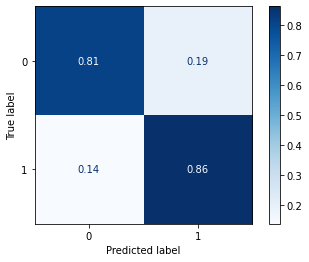

In [9]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

# various models that would combine to an ensemble
# these base models can be hyptertuned to get desired results
clf_rf = RandomForestClassifier(random_state=55, n_jobs=1, n_estimators = 150)
clf_svm = SVC(random_state=55, probability=True)
clf_knn = KNeighborsClassifier(n_neighbors=5)
estimators = [clf_rf, clf_knn, clf_knn]

# the parameter voting=soft, considers the average predicted probabilities to predict the class label
ensemble = VotingClassifier(estimators=[('svm', clf_svm), ('rf', clf_rf), ('knn', clf_knn)],voting='soft', 
                            weights=[1,1,1])
    

en1_acc, en1_f1, en1_pp = model(ensemble, X_train,X_test,y_train,y_test)
end_time = time.time()
final_scores[("Fully Supervised Accuracy", "Fully Supervised F1 Score")] = (en1_acc,en1_f1)

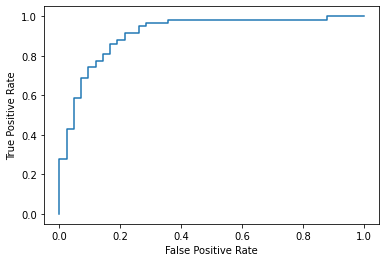

In [10]:
en1_fpr, en1_tpr = plot_roc(y_test, en1_pp)

In [11]:
time_elapsed["Fully Supervised"] = end_time - start_time
print(f"Time Elapsed : 100% Supervised Data : {time_elapsed['Fully Supervised']}")

Time Elapsed : 100% Supervised Data : 0.26567816734313965


#### 10% Unlabelled Data

In [12]:
df = data.sample(frac=1, random_state=50)
df.head()

,major_vessels_num_0,major_vessels_num_1,major_vessels_num_2,major_vessels_num_3,major_vessels_num_4,exercise_induced_angina_0,exercise_induced_angina_1,sex_0,sex_1,slope_st_0,...,thalassemia_1,thalassemia_2,thalassemia_3,maximum_heart_rate,oldpeak,chest_pain_0,chest_pain_1,chest_pain_2,chest_pain_3,target
112,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0.473282,0.032258,0,0,1,0,1
63,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0.465649,0.000000,0,1,0,0,1
270,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0.557252,0.129032,1,0,0,0,0
39,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0.610687,0.129032,0,0,1,0,1
277,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0.534351,0.048387,0,1,0,0,0


In [13]:
# generating the split indices and partition of data
unlabelled_data_ind = round(len(df) * 0.10)
train_ind = unlabelled_data_ind + round(len(df) * 0.60)
test_ind = train_ind + round(len(df) * 0.30)

unlabelled = df.iloc[:unlabelled_data_ind]
train = df.iloc[unlabelled_data_ind:train_ind]
test = df.iloc[train_ind:]

# assigning the data to train, test and unlabelled sets
X_train = train.drop('target', axis=1)
y_train = train['target']

X_test = test.drop('target', axis=1)
y_test = test['target']

X_unlabeled = unlabelled.drop('target', axis=1)


# Check dimensions of data after splitting

print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}\n")

print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}\n")

print(f"X_unlabeled dimensions: {X_unlabeled.shape}")

X_train dimensions: (182, 22)
y_train dimensions: (182,)

X_test dimensions: (91, 22)
y_test dimensions: (91,)

X_unlabeled dimensions: (30, 22)


Class Distirbution; almost identical

<AxesSubplot:>

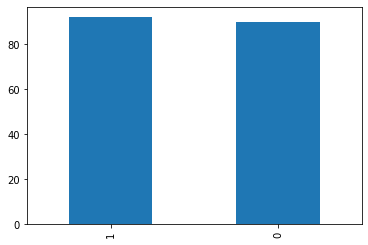

In [14]:
y_train.value_counts().plot(kind='bar')

STEPS followed : 
- Train a Ensemble (with SVM, RF and KNN) Classifier on the labelled data
- Use this classifier to predict labels for the unlabelled data, adopt pseudo-lables with prediction probability greater or equal to 95
- Concatenate the ‘pseudo-labeled’ data with the labeled training data, and re-train the classifier on the concatenated data.
- Use trained classifier to make predictions for the labeled test data, and evaluate the classifier.
- Repeat these steps until no more predictions have a probability greater than 95

------------------------------------------------------------
Test Scores : VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=55)),
                             ('rf',
                              RandomForestClassifier(n_estimators=150, n_jobs=1,
                                                     random_state=55)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft', weights=[1, 1, 1])
Accuracy:0.8241758241758241	F1 Score:0.8545454545454546
------------------------------------------------------------


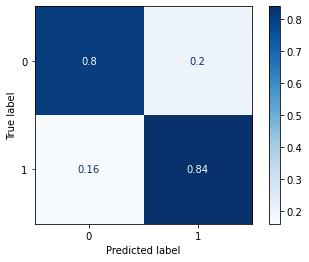

In [15]:
# initial classifier on this data
start_time = time.time()
en2_acc, en2_f1, en2_pp = model(ensemble, X_train,X_test,y_train,y_test)

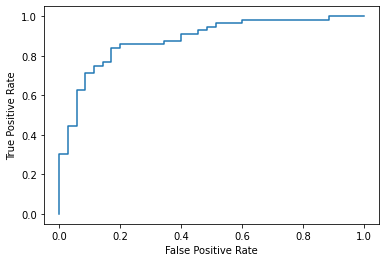

In [16]:
_, _ = plot_roc(y_test, en2_pp)

In [17]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1] 

# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0:
        
    # Fit classifier and make train/test predictions
    clf = ensemble
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    test_f1, test_acc = get_scores(y_test, y_pred)
    print(f"Iteration {iterations}")
    print(f"Accuracy : {test_acc}\tF1 Score ; {test_f1}")
    test_f1s.append(test_f1)
   
    # Generate predictions and probabilities for unlabeled data
    print(f"Now predicting labels for unlabeled data...")

    pred_probs = clf.predict_proba(X_unlabeled)
    preds = clf.predict(X_unlabeled)
    prob_0 = pred_probs[:,0]
    prob_1 = pred_probs[:,1]

    # Store predictions and probabilities in dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['preds'] = preds
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    df_pred_prob.index = X_unlabeled.index
    
    # Separate predictions with > 95% probability
    high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.98],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > 0.98]],
                          axis=0)
    
    print(f"{len(high_prob)} high-probability predictions added to training data.")
    
    pseudo_labels.append(len(high_prob))

    # Add pseudo-labeled data to training data
    X_train = pd.concat([X_train, X_unlabeled.loc[high_prob.index]], axis=0)
    y_train = pd.concat([y_train, high_prob.preds])      
    
    # Drop pseudo-labeled instances from unlabeled data
    X_unlabeled = X_unlabeled.drop(index=high_prob.index)
    print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")
    
    # Update iteration counter
    iterations += 1

end_time = time.time()

Iteration 0
Accuracy : 0.8241758241758241	F1 Score ; 0.8545454545454546
Now predicting labels for unlabeled data...
3 high-probability predictions added to training data.
27 unlabeled instances remaining.

Iteration 1
Accuracy : 0.8131868131868132	F1 Score ; 0.8468468468468467
Now predicting labels for unlabeled data...
2 high-probability predictions added to training data.
25 unlabeled instances remaining.

Iteration 2
Accuracy : 0.8241758241758241	F1 Score ; 0.8545454545454546
Now predicting labels for unlabeled data...
0 high-probability predictions added to training data.
25 unlabeled instances remaining.



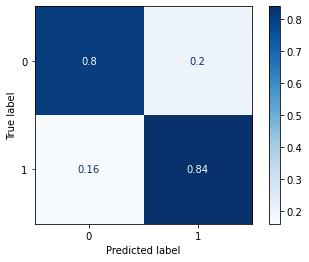

In [18]:
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true')

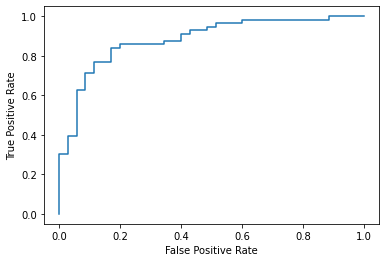

In [19]:
en2_fpr, en2_tpr = plot_roc(y_test, clf.predict_proba(X_test))

In [20]:
final_scores[('10% Unlabelled Data Accuracy', '10% Unlabelled Data F1 score')] = (test_acc, test_f1)
time_elapsed["10% Unlabelled"] = end_time - start_time
print(f"Time Elapsed, 10% Unlabelled Data : {time_elapsed['10% Unlabelled']}")

Time Elapsed, 10% Unlabelled Data : 1.131263017654419


#### 20% unlabelled data

In [21]:
df = data.sample(frac=1, random_state=50)
df.head()

,major_vessels_num_0,major_vessels_num_1,major_vessels_num_2,major_vessels_num_3,major_vessels_num_4,exercise_induced_angina_0,exercise_induced_angina_1,sex_0,sex_1,slope_st_0,...,thalassemia_1,thalassemia_2,thalassemia_3,maximum_heart_rate,oldpeak,chest_pain_0,chest_pain_1,chest_pain_2,chest_pain_3,target
112,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0.473282,0.032258,0,0,1,0,1
63,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0.465649,0.000000,0,1,0,0,1
270,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0.557252,0.129032,1,0,0,0,0
39,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0.610687,0.129032,0,0,1,0,1
277,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0.534351,0.048387,0,1,0,0,0


In [22]:
# generating the split indices and partition of data
unlabelled_data_ind = round(len(df) * 0.20)
train_ind = unlabelled_data_ind + round(len(df) * 0.60)
test_ind = train_ind + round(len(df) * 0.20)

unlabelled = df.iloc[:unlabelled_data_ind]
train = df.iloc[unlabelled_data_ind:train_ind]
test = df.iloc[train_ind:]

# assigning the data to train, test and unlabelled sets
X_train = train.drop('target', axis=1)
y_train = train['target']

X_test = test.drop('target', axis=1)
y_test = test['target']

X_unlabeled = unlabelled.drop('target', axis=1)


# Check dimensions of data after splitting

print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}\n")

print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}\n")

print(f"X_unlabeled dimensions: {X_unlabeled.shape}")

X_train dimensions: (182, 22)
y_train dimensions: (182,)

X_test dimensions: (60, 22)
y_test dimensions: (60,)

X_unlabeled dimensions: (61, 22)


<AxesSubplot:>

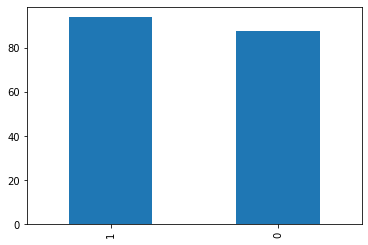

In [23]:
y_train.value_counts().plot(kind='bar')

------------------------------------------------------------
Test Scores : VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=55)),
                             ('rf',
                              RandomForestClassifier(n_estimators=150, n_jobs=1,
                                                     random_state=55)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft', weights=[1, 1, 1])
Accuracy:0.7666666666666667	F1 Score:0.7941176470588236
------------------------------------------------------------


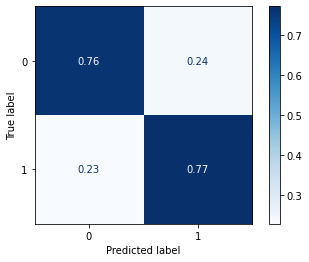

In [24]:
# initial classifier on this data
start_time = time.time()

en3_acc, en3_f1, en3_pp = model(ensemble, X_train,X_test,y_train,y_test)

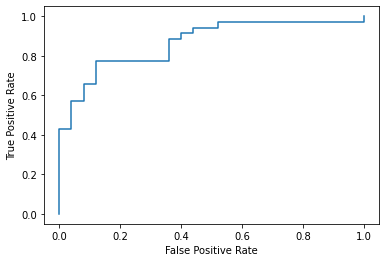

In [25]:
_,_ = plot_roc(y_test, en3_pp)

In [26]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1] 

# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0:
        
    # Fit classifier and make train/test predictions
    clf = ensemble
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    test_f1, test_acc = get_scores(y_test, y_pred)
    print(f"Iteration {iterations}")
    print(f"Accuracy : {test_acc}\tF1 Score ; {test_f1}")
    test_f1s.append(test_f1)
   
    # Generate predictions and probabilities for unlabeled data
    print(f"Now predicting labels for unlabeled data...")

    pred_probs = clf.predict_proba(X_unlabeled)
    preds = clf.predict(X_unlabeled)
    prob_0 = pred_probs[:,0]
    prob_1 = pred_probs[:,1]

    # Store predictions and probabilities in dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['preds'] = preds
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    df_pred_prob.index = X_unlabeled.index
    
    # Separate predictions with > 95% probability
    high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.98],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > 0.98]],
                          axis=0)
    
    print(f"{len(high_prob)} high-probability predictions added to training data.")
    
    pseudo_labels.append(len(high_prob))

    # Add pseudo-labeled data to training data
    X_train = pd.concat([X_train, X_unlabeled.loc[high_prob.index]], axis=0)
    y_train = pd.concat([y_train, high_prob.preds])      
    
    # Drop pseudo-labeled instances from unlabeled data
    X_unlabeled = X_unlabeled.drop(index=high_prob.index)
    print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")
    
    # Update iteration counter
    iterations += 1
end_time = time.time()

Iteration 0
Accuracy : 0.7666666666666667	F1 Score ; 0.7941176470588236
Now predicting labels for unlabeled data...
11 high-probability predictions added to training data.
50 unlabeled instances remaining.

Iteration 1
Accuracy : 0.7666666666666667	F1 Score ; 0.7941176470588236
Now predicting labels for unlabeled data...
0 high-probability predictions added to training data.
50 unlabeled instances remaining.



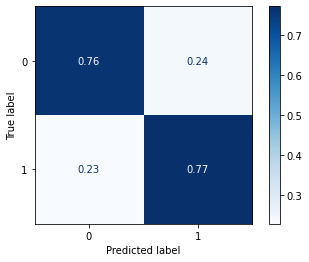

In [27]:
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true')

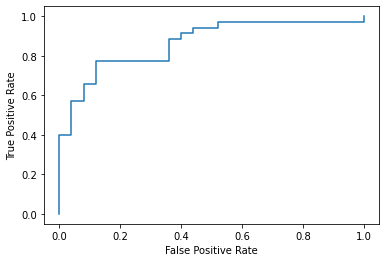

In [28]:
en3_fpr, en3_tpr = plot_roc(y_test, clf.predict_proba(X_test))

In [29]:
final_scores[('20% Unlabelled Data Accuracy', '20% Unlabelled Data F1 score')] = (test_acc, test_f1)
time_elapsed["20% Unlabelled"] = end_time - start_time
print(f"Time Elapsed, 20% Unlabelled Data : {time_elapsed['20% Unlabelled']}")

Time Elapsed, 20% Unlabelled Data : 0.8783721923828125


#### 50% Unlabelled Data

In [30]:
df = data.sample(frac=1, random_state=50)
df.head()

,major_vessels_num_0,major_vessels_num_1,major_vessels_num_2,major_vessels_num_3,major_vessels_num_4,exercise_induced_angina_0,exercise_induced_angina_1,sex_0,sex_1,slope_st_0,...,thalassemia_1,thalassemia_2,thalassemia_3,maximum_heart_rate,oldpeak,chest_pain_0,chest_pain_1,chest_pain_2,chest_pain_3,target
112,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0.473282,0.032258,0,0,1,0,1
63,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0.465649,0.000000,0,1,0,0,1
270,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0.557252,0.129032,1,0,0,0,0
39,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0.610687,0.129032,0,0,1,0,1
277,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0.534351,0.048387,0,1,0,0,0


In [31]:
# generating the split indices and partition of data
unlabelled_data_ind = round(len(df) * 0.50)
train_ind = unlabelled_data_ind + round(len(df) * 0.35)
test_ind = train_ind + round(len(df) * 0.15)

unlabelled = df.iloc[:unlabelled_data_ind]
train = df.iloc[unlabelled_data_ind:train_ind]
test = df.iloc[train_ind:]

# assigning the data to train, test and unlabelled sets
X_train = train.drop('target', axis=1)
y_train = train['target']

X_test = test.drop('target', axis=1)
y_test = test['target']

X_unlabeled = unlabelled.drop('target', axis=1)


# Check dimensions of data after splitting

print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}\n")

print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}\n")

print(f"X_unlabeled dimensions: {X_unlabeled.shape}")

X_train dimensions: (106, 22)
y_train dimensions: (106,)

X_test dimensions: (45, 22)
y_test dimensions: (45,)

X_unlabeled dimensions: (152, 22)


<AxesSubplot:>

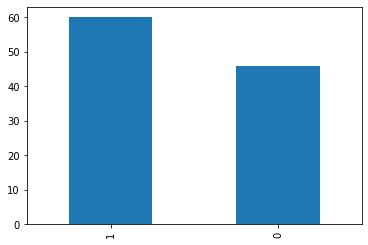

In [32]:
y_train.value_counts().plot(kind='bar')

------------------------------------------------------------
Test Scores : VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=55)),
                             ('rf',
                              RandomForestClassifier(n_estimators=150, n_jobs=1,
                                                     random_state=55)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft', weights=[1, 1, 1])
Accuracy:0.7111111111111111	F1 Score:0.7636363636363638
------------------------------------------------------------


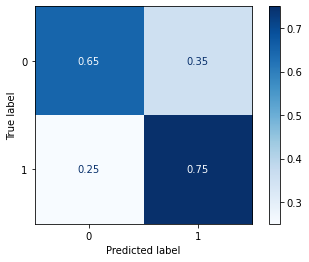

In [33]:
# initial classifier on this data
start_time = time.time()

en4_acc, en4_f1, en4_pp = model(ensemble, X_train,X_test,y_train,y_test)

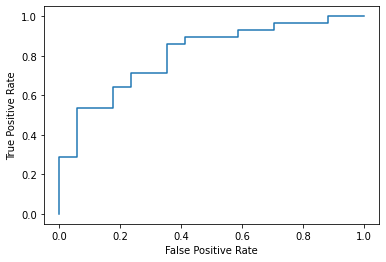

In [34]:
_, _ = plot_roc(y_test, en4_pp)

In [35]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1] 

# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0:
        
    # Fit classifier and make train/test predictions
    clf = ensemble
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    test_f1, test_acc = get_scores(y_test, y_pred)
    print(f"Iteration {iterations}")
    print(f"Accuracy : {test_acc}\tF1 Score ; {test_f1}")
    test_f1s.append(test_f1)
   
    # Generate predictions and probabilities for unlabeled data
    print(f"Now predicting labels for unlabeled data...")

    pred_probs = clf.predict_proba(X_unlabeled)
    preds = clf.predict(X_unlabeled)
    prob_0 = pred_probs[:,0]
    prob_1 = pred_probs[:,1]

    # Store predictions and probabilities in dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['preds'] = preds
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    df_pred_prob.index = X_unlabeled.index
    
    # Separate predictions with > 95% probability
    high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.98],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > 0.98]],
                          axis=0)
    
    print(f"{len(high_prob)} high-probability predictions added to training data.")
    
    pseudo_labels.append(len(high_prob))

    # Add pseudo-labeled data to training data
    X_train = pd.concat([X_train, X_unlabeled.loc[high_prob.index]], axis=0)
    y_train = pd.concat([y_train, high_prob.preds])      
    
    # Drop pseudo-labeled instances from unlabeled data
    X_unlabeled = X_unlabeled.drop(index=high_prob.index)
    print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")
    
    # Update iteration counter
    iterations += 1
end_time = time.time()

Iteration 0
Accuracy : 0.7111111111111111	F1 Score ; 0.7636363636363638
Now predicting labels for unlabeled data...
17 high-probability predictions added to training data.
135 unlabeled instances remaining.

Iteration 1
Accuracy : 0.7111111111111111	F1 Score ; 0.7636363636363638
Now predicting labels for unlabeled data...
9 high-probability predictions added to training data.
126 unlabeled instances remaining.

Iteration 2
Accuracy : 0.7333333333333333	F1 Score ; 0.7857142857142857
Now predicting labels for unlabeled data...
7 high-probability predictions added to training data.
119 unlabeled instances remaining.

Iteration 3
Accuracy : 0.7333333333333333	F1 Score ; 0.7857142857142857
Now predicting labels for unlabeled data...
2 high-probability predictions added to training data.
117 unlabeled instances remaining.

Iteration 4
Accuracy : 0.7333333333333333	F1 Score ; 0.7857142857142857
Now predicting labels for unlabeled data...
1 high-probability predictions added to training data.


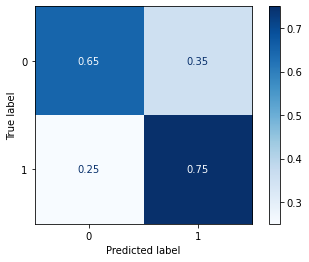

In [36]:
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true')

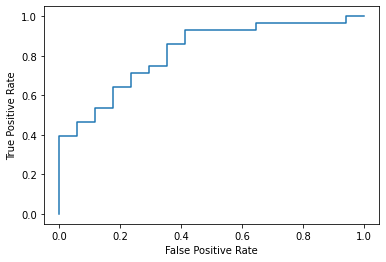

In [37]:
en4_fpr, en4_tpr = plot_roc(y_test, clf.predict_proba(X_test))

In [38]:
final_scores[('50% Unlabelled Data Accuracy', '50% Unlabelled Data F1 score')] = (test_acc, test_f1)
time_elapsed["50% Unlabelled"] = end_time - start_time
print(f"Time Elapsed, 50% Unlabelled Data : {time_elapsed['50% Unlabelled']}")

Time Elapsed, 50% Unlabelled Data : 1.938384771347046


For the instance when the amount of unlabelled data was 50% the model was able to had the same accuracy score of 75% even after self training, it was also able to add 84 instances of data to the training set

#### 90% unlabelled data

In [39]:
df = data.sample(frac=1, random_state=50)
df.head()

,major_vessels_num_0,major_vessels_num_1,major_vessels_num_2,major_vessels_num_3,major_vessels_num_4,exercise_induced_angina_0,exercise_induced_angina_1,sex_0,sex_1,slope_st_0,...,thalassemia_1,thalassemia_2,thalassemia_3,maximum_heart_rate,oldpeak,chest_pain_0,chest_pain_1,chest_pain_2,chest_pain_3,target
112,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0.473282,0.032258,0,0,1,0,1
63,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0.465649,0.000000,0,1,0,0,1
270,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0.557252,0.129032,1,0,0,0,0
39,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0.610687,0.129032,0,0,1,0,1
277,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0.534351,0.048387,0,1,0,0,0


In [40]:
# generating the split indices and partition of data
unlabelled_data_ind = round(len(df) * 0.90)
train_ind = unlabelled_data_ind + round(len(df) * 0.07)
test_ind = train_ind + round(len(df) * 0.03)

unlabelled = df.iloc[:unlabelled_data_ind]
train = df.iloc[unlabelled_data_ind:train_ind]
test = df.iloc[train_ind:]

# assigning the data to train, test and unlabelled sets
X_train = train.drop('target', axis=1)
y_train = train['target']

X_test = test.drop('target', axis=1)
y_test = test['target']

X_unlabeled = unlabelled.drop('target', axis=1)


# Check dimensions of data after splitting

print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}\n")

print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}\n")

print(f"X_unlabeled dimensions: {X_unlabeled.shape}")

X_train dimensions: (21, 22)
y_train dimensions: (21,)

X_test dimensions: (9, 22)
y_test dimensions: (9,)

X_unlabeled dimensions: (273, 22)


<AxesSubplot:>

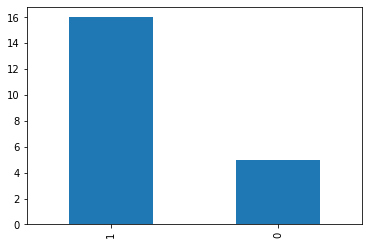

In [41]:
y_train.value_counts().plot(kind='bar')

------------------------------------------------------------
Test Scores : VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=55)),
                             ('rf',
                              RandomForestClassifier(n_estimators=150, n_jobs=1,
                                                     random_state=55)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft', weights=[1, 1, 1])
Accuracy:0.5555555555555556	F1 Score:0.6
------------------------------------------------------------


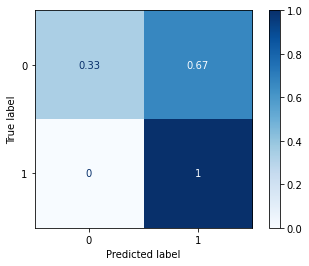

In [42]:
# initial classifier on this data
start_time = time.time()

en5_acc, en5_f1, en5_pp = model(ensemble, X_train,X_test,y_train,y_test)

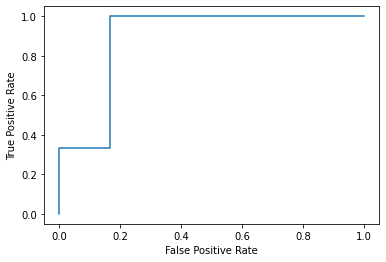

In [43]:
_,_ = plot_roc(y_test, en5_pp)

In [44]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1] 

# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0:
        
    # Fit classifier and make train/test predictions
    clf = ensemble
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    test_f1, test_acc = get_scores(y_test, y_pred)
    print(f"Iteration {iterations}")
    print(f"Accuracy : {test_acc}\tF1 Score ; {test_f1}")
    test_f1s.append(test_f1)
   
    # Generate predictions and probabilities for unlabeled data
    print(f"Now predicting labels for unlabeled data...")

    pred_probs = clf.predict_proba(X_unlabeled)
    preds = clf.predict(X_unlabeled)
    prob_0 = pred_probs[:,0]
    prob_1 = pred_probs[:,1]

    # Store predictions and probabilities in dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['preds'] = preds
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    df_pred_prob.index = X_unlabeled.index
    
    # Separate predictions with > 95% probability
    high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.98],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > 0.98]],
                          axis=0)
    
    print(f"{len(high_prob)} high-probability predictions added to training data.")
    
    pseudo_labels.append(len(high_prob))

    # Add pseudo-labeled data to training data
    X_train = pd.concat([X_train, X_unlabeled.loc[high_prob.index]], axis=0)
    y_train = pd.concat([y_train, high_prob.preds])      
    
    # Drop pseudo-labeled instances from unlabeled data
    X_unlabeled = X_unlabeled.drop(index=high_prob.index)
    print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")
    
    # Update iteration counter
    iterations += 1
end_time = time.time()    

Iteration 0
Accuracy : 0.5555555555555556	F1 Score ; 0.6
Now predicting labels for unlabeled data...
45 high-probability predictions added to training data.
228 unlabeled instances remaining.

Iteration 1
Accuracy : 0.6666666666666666	F1 Score ; 0.6666666666666666
Now predicting labels for unlabeled data...
24 high-probability predictions added to training data.
204 unlabeled instances remaining.

Iteration 2
Accuracy : 0.6666666666666666	F1 Score ; 0.6666666666666666
Now predicting labels for unlabeled data...
7 high-probability predictions added to training data.
197 unlabeled instances remaining.

Iteration 3
Accuracy : 0.6666666666666666	F1 Score ; 0.6666666666666666
Now predicting labels for unlabeled data...
3 high-probability predictions added to training data.
194 unlabeled instances remaining.

Iteration 4
Accuracy : 0.6666666666666666	F1 Score ; 0.6666666666666666
Now predicting labels for unlabeled data...
0 high-probability predictions added to training data.
194 unlabeled 

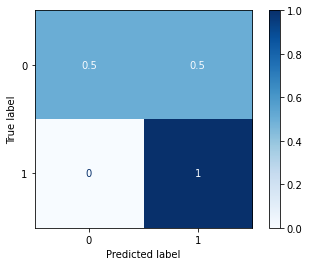

In [45]:
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true')

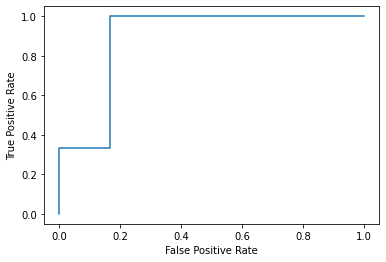

In [46]:
en5_fpr, en5_tpr = plot_roc(y_test, clf.predict_proba(X_test))

In [47]:
final_scores[('90% Unlabelled Data Accuracy', '90% Unlabelled Data F1 score')] = (test_acc, test_f1)
time_elapsed["90% Unlabelled"] = end_time - start_time
print(f"Time Elapsed, 90% Unlabelled Dataset : {time_elapsed['90% Unlabelled']}")

Time Elapsed, 90% Unlabelled Dataset : 1.804123878479004


#### 95% unlabelled data

In [48]:
df = data.sample(frac=1, random_state=50)
df.head()

,major_vessels_num_0,major_vessels_num_1,major_vessels_num_2,major_vessels_num_3,major_vessels_num_4,exercise_induced_angina_0,exercise_induced_angina_1,sex_0,sex_1,slope_st_0,...,thalassemia_1,thalassemia_2,thalassemia_3,maximum_heart_rate,oldpeak,chest_pain_0,chest_pain_1,chest_pain_2,chest_pain_3,target
112,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0.473282,0.032258,0,0,1,0,1
63,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0.465649,0.000000,0,1,0,0,1
270,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0.557252,0.129032,1,0,0,0,0
39,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0.610687,0.129032,0,0,1,0,1
277,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0.534351,0.048387,0,1,0,0,0


In [49]:
# generating the split indices and partition of data
unlabelled_data_ind = round(len(df) * 0.95)
train_ind = unlabelled_data_ind + round(len(df) * 0.04)
test_ind = train_ind + round(len(df) * 0.01)

unlabelled = df.iloc[:unlabelled_data_ind]
train = df.iloc[unlabelled_data_ind:train_ind]
test = df.iloc[train_ind:]

# assigning the data to train, test and unlabelled sets
X_train = train.drop('target', axis=1)
y_train = train['target']

X_test = test.drop('target', axis=1)
y_test = test['target']

X_unlabeled = unlabelled.drop('target', axis=1)


# Check dimensions of data after splitting

print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}\n")

print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}\n")

print(f"X_unlabeled dimensions: {X_unlabeled.shape}")

X_train dimensions: (12, 22)
y_train dimensions: (12,)

X_test dimensions: (3, 22)
y_test dimensions: (3,)

X_unlabeled dimensions: (288, 22)


<AxesSubplot:>

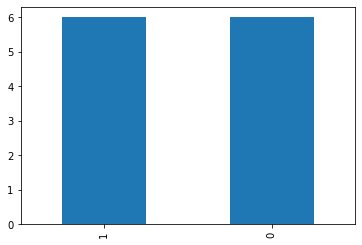

In [50]:
y_train.value_counts().plot(kind='bar')

------------------------------------------------------------
Test Scores : VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=55)),
                             ('rf',
                              RandomForestClassifier(n_estimators=150, n_jobs=1,
                                                     random_state=55)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft', weights=[1, 1, 1])
Accuracy:1.0	F1 Score:1.0
------------------------------------------------------------


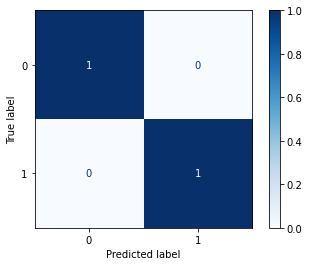

In [51]:
# initial classifier on this data
start_time = time.time()

en6_acc, en6_f1, en6_pp = model(ensemble, X_train,X_test,y_train,y_test)

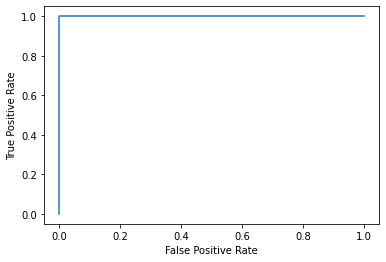

In [52]:
_, _ = plot_roc(y_test, en6_pp)

In [53]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1] 

# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0:
        
    # Fit classifier and make train/test predictions
    clf = ensemble
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    test_f1, test_acc = get_scores(y_test, y_pred)
    print(f"Iteration {iterations}")
    print(f"Accuracy : {test_acc}\tF1 Score ; {test_f1}")
    test_f1s.append(test_f1)
   
    # Generate predictions and probabilities for unlabeled data
    print(f"Now predicting labels for unlabeled data...")

    pred_probs = clf.predict_proba(X_unlabeled)
    preds = clf.predict(X_unlabeled)
    prob_0 = pred_probs[:,0]
    prob_1 = pred_probs[:,1]

    # Store predictions and probabilities in dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['preds'] = preds
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    df_pred_prob.index = X_unlabeled.index
    
    # Separate predictions with > 95% probability
    high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.98],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > 0.98]],
                          axis=0)
    
    print(f"{len(high_prob)} high-probability predictions added to training data.")
    
    pseudo_labels.append(len(high_prob))

    # Add pseudo-labeled data to training data
    X_train = pd.concat([X_train, X_unlabeled.loc[high_prob.index]], axis=0)
    y_train = pd.concat([y_train, high_prob.preds])      
    
    # Drop pseudo-labeled instances from unlabeled data
    X_unlabeled = X_unlabeled.drop(index=high_prob.index)
    print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")
    
    # Update iteration counter
    iterations += 1
end_time = time.time()

Iteration 0
Accuracy : 1.0	F1 Score ; 1.0
Now predicting labels for unlabeled data...
0 high-probability predictions added to training data.
288 unlabeled instances remaining.



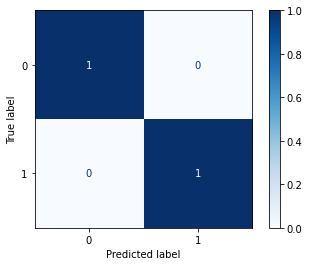

In [54]:
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true')

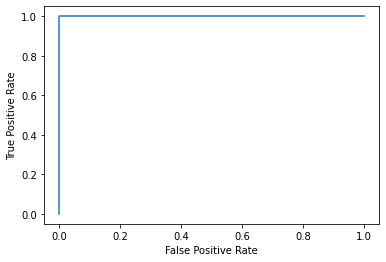

In [55]:
en6_fpr, en6_tpr = plot_roc(y_test, clf.predict_proba(X_test))

In [56]:
final_scores[('95% Unlabelled Data Accuracy', '95% Unlabelled Data F1 score')] = (test_acc, test_f1)
time_elapsed["95% Unlabelled"] = end_time - start_time
print(f"Time elapsed, 95% Unlabelled Dataset : {time_elapsed['95% Unlabelled']}")

Time elapsed, 95% Unlabelled Dataset : 0.764631986618042


#### FINAL RESULTS

In [57]:
final_scores

{('Fully Supervised Accuracy', 'Fully Supervised F1 Score'): (0.84,
  0.8620689655172413),
 ('10% Unlabelled Data Accuracy',
  '10% Unlabelled Data F1 score'): (0.8241758241758241, 0.8545454545454546),
 ('20% Unlabelled Data Accuracy',
  '20% Unlabelled Data F1 score'): (0.7666666666666667, 0.7941176470588236),
 ('50% Unlabelled Data Accuracy',
  '50% Unlabelled Data F1 score'): (0.7111111111111111, 0.7636363636363638),
 ('90% Unlabelled Data Accuracy',
  '90% Unlabelled Data F1 score'): (0.6666666666666666, 0.6666666666666666),
 ('95% Unlabelled Data Accuracy', '95% Unlabelled Data F1 score'): (1.0, 1.0)}

In [58]:
final_scores_df = pd.DataFrame(data=['Nan'], index=[0])
for key, value in final_scores.items():
    final_scores_df[key[0]] = value[0]
    final_scores_df[key[1]] = value[1]

In [59]:
final_scores_df.drop(columns=[final_scores_df.columns[0]], inplace=True)
final_scores_df

,Fully Supervised Accuracy,Fully Supervised F1 Score,10% Unlabelled Data Accuracy,10% Unlabelled Data F1 score,20% Unlabelled Data Accuracy,20% Unlabelled Data F1 score,50% Unlabelled Data Accuracy,50% Unlabelled Data F1 score,90% Unlabelled Data Accuracy,90% Unlabelled Data F1 score,95% Unlabelled Data Accuracy,95% Unlabelled Data F1 score
0,0.84,0.862069,0.824176,0.854545,0.766667,0.794118,0.711111,0.763636,0.666667,0.666667,1.0,1.0


In [ ]:
plt.plot(en1_fpr, en1_tpr,color="orange", label="Fullysupervised")
plt.plot(en2_fpr, en2_tpr,color="blue", label="10% Unlabelled Data")
plt.plot(en3_fpr, en3_tpr,color="green", label="20% Unlabelled Data")
plt.plot(en4_fpr, en4_tpr,color="red", label="50% Unlabelled Data")
plt.plot(en5_fpr, en5_tpr,color="yellow", label="90% Unlabelled Data")
plt.plot(en6_fpr, en6_tpr,color="black", label="95% Unlabelled Data")
plt.xlabel("False Positive Rate")
plt.ylabel("Ture Positive Rate")
plt.legend()